In [97]:
import torch
import torch.nn as nn
import torch.nn.functional as F  #helps moving data forward in the function

### Defining custom nn model

In [98]:
class Model(nn.Module):  # inherits nn.Module class
    
    def __init__(self, in_ft=4, h1=8, h2=8, out_ft=3):
        super().__init__()  #instantiate nn.Module
        self.fc1 = nn.Linear(in_ft,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_ft)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) # forward the calculated data with function activation to hidden layer h1
        x = F.relu(self.fc2(x)) # forward the calculated data with function activation to hidden layer h2
        x = self.out(x) # forward the data to output layer
        
        return x

In [99]:
#chosing a manual seed
torch.manual_seed(42)

#Creating model instance
model = Model()

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

In [102]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Replacing categories with numbers

In [103]:
df['species'] = df['species'].replace({'setosa': 0.0, 'versicolor': 1.0, 'virginica': 2.0})

In [104]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Seperating feature columns and the label column

In [105]:
X = df.drop('species', axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [106]:
y = df['species']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: species, Length: 150, dtype: float64

In [107]:
## Convert these to nompy arrays
X = X.values
y = y.values

## Train test split

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [110]:
X_train

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3

In [111]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

## Converting the trianing and test sets to tensor type 

In [112]:
X_train_tensor = torch.FloatTensor(X_train)
#X_train_tensor
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

In [113]:
## Setting model 'criterion' for measuring the error i.e difference in the predicted values and the actual values
criterion = nn.CrossEntropyLoss()

## Optimizer and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [114]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>

## Training the model

In [115]:
epoch = 200
losses = []

for i in range(epoch):
    y_pred = model.forward(X_train_tensor)  #getting prediction from the forward pass
    
    # Measure the loss
    loss = criterion(y_pred, y_train_tensor)
    losses.append(loss.detach().numpy())
    
    if i%10==0:
        print(f'Epoch {i}: and Loss is {loss}')
        
    # Back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0: and Loss is 1.1845605373382568
Epoch 10: and Loss is 1.0079851150512695
Epoch 20: and Loss is 0.8848630785942078
Epoch 30: and Loss is 0.7344269752502441
Epoch 40: and Loss is 0.5046502947807312
Epoch 50: and Loss is 0.36293286085128784
Epoch 60: and Loss is 0.21315856277942657
Epoch 70: and Loss is 0.11690180748701096
Epoch 80: and Loss is 0.08288256824016571
Epoch 90: and Loss is 0.07021331042051315
Epoch 100: and Loss is 0.06371860951185226
Epoch 110: and Loss is 0.059760160744190216
Epoch 120: and Loss is 0.05701368302106857
Epoch 130: and Loss is 0.05489577353000641
Epoch 140: and Loss is 0.053182873874902725
Epoch 150: and Loss is 0.051997166126966476
Epoch 160: and Loss is 0.050496309995651245
Epoch 170: and Loss is 0.049333151429891586
Epoch 180: and Loss is 0.048191145062446594
Epoch 190: and Loss is 0.04711086302995682


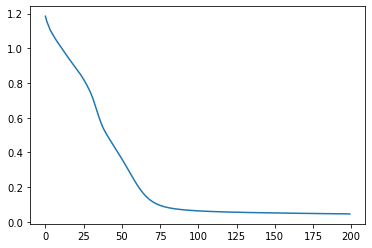

In [116]:
plt.plot(range(epoch), losses)